## In-Person Experiment:

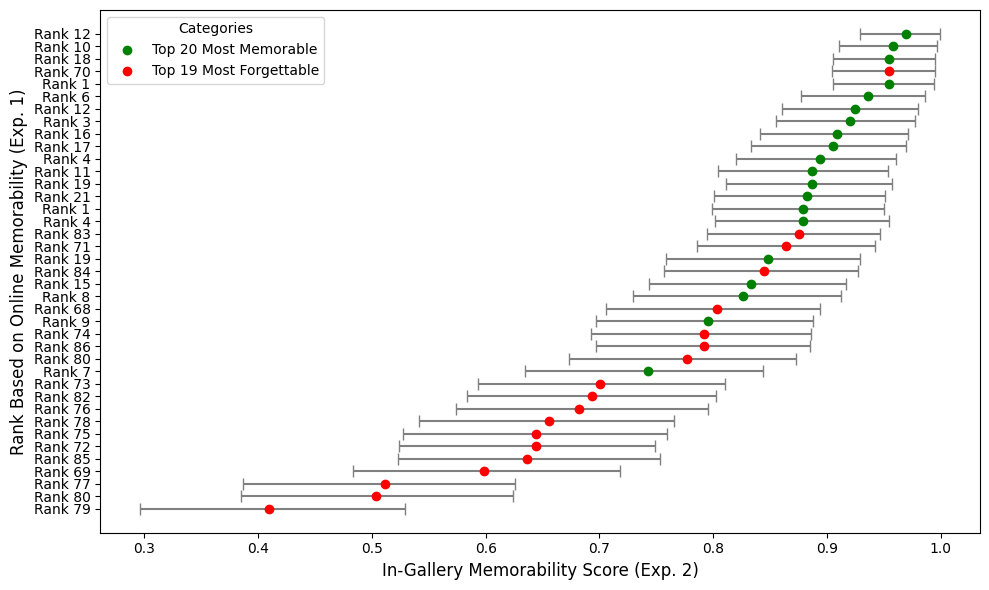

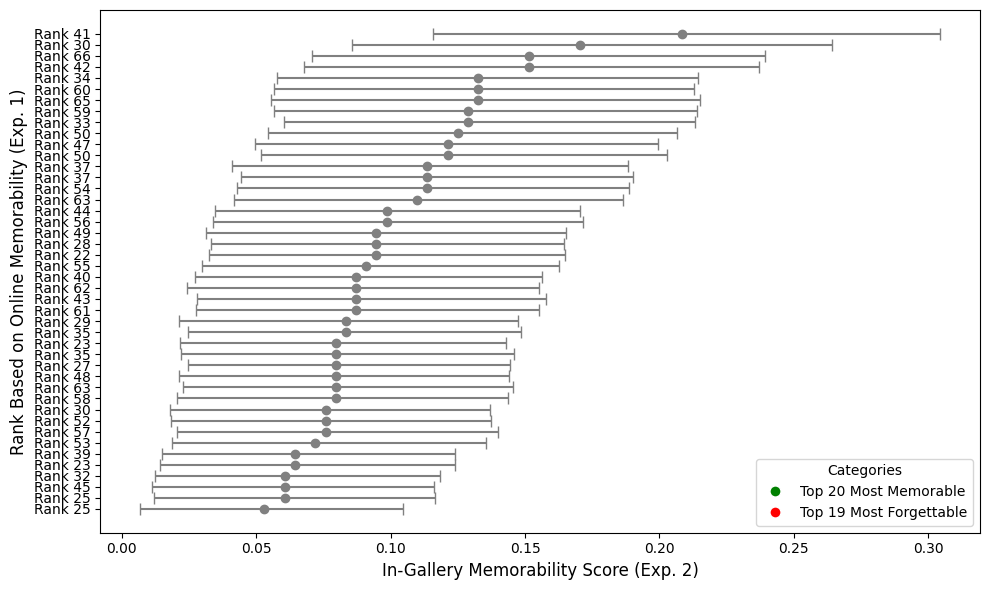

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Reload the dataset
file_path = "/Users/Yifei/ARTCONTEST/Analyses/data/All_Predictors.csv"
df = pd.read_csv(file_path)
df_all = df[~df["Name"].isin(["Dan - Forget", "Dan - Mem", "Trent - Mem", "Trent - Forget"])]

# Exclude "Exc" and separate targets (Mem & Forg) and foils
df = df[df["Label"] != "Exc"]
df_targets = df[df["Label"].isin(["Mem", "Forg"])].sort_values("Bayes_IP_HR_FAR", ascending=False)
df_foils = df[df["Label"] == "Foil"].sort_values("Bayes_IP_HR_FAR", ascending=False)

# Function to plot HDI intervals with different colors for "Mem" and "Forg"
def plot_hdi_intervals(df_subset, df_all, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    y_positions = np.arange(len(df_subset))

    # Assign colors
    colors = df_subset["Label"].map({"Mem": "green", "Forg": "red"}).fillna("gray")

    # Compute full OnlineMem rank across all artworks
    #full_ranks = df_all["OnlineMem"].rank(method="min", ascending=False)
    global_ranks = df_subset["Name"].map(df_all.set_index("Name")["OnlineMem"].rank(method="min", ascending=False).astype(int))
    rank_labels = [f"Rank {rank}" for rank in global_ranks]

    # Plot HDI intervals
    for i, (posterior, lower, upper, color) in enumerate(zip(df_subset["Bayes_IP_HR_FAR"], df_subset["Lower_HDI"], df_subset["Upper_HDI"], colors)):
        ax.errorbar(
            posterior, y_positions[i], 
            xerr=[[posterior - lower], [upper - posterior]], 
            fmt='o', color=color, ecolor='gray', capsize=4
        )

    ax.set_yticks(y_positions)
    ax.set_yticklabels(rank_labels)
    ax.set_ylabel("Rank Based on Online Memorability (Exp. 1)", fontsize=12)

    ax.set_xlabel("In-Gallery Memorability Score (Exp. 2)", fontsize=12)
    #ax.set_title(title)
    ax.grid(False)
    plt.gca().invert_yaxis()

    # Legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Top 20 Most Memorable'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Top 19 Most Forgettable')
    ]
    ax.legend(handles=legend_elements, title="Categories")

    plt.tight_layout()
    plt.show()

# Plot HDI intervals for targets and foils
plot_hdi_intervals(df_targets, df_all, "In-Gallery Memorability with HDI Intervals for 39 Exhibited Artworks")
plot_hdi_intervals(df_foils, df_all, "HDI Intervals for Foil Images")


/Users/Yifei/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Yifei/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Yifei/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


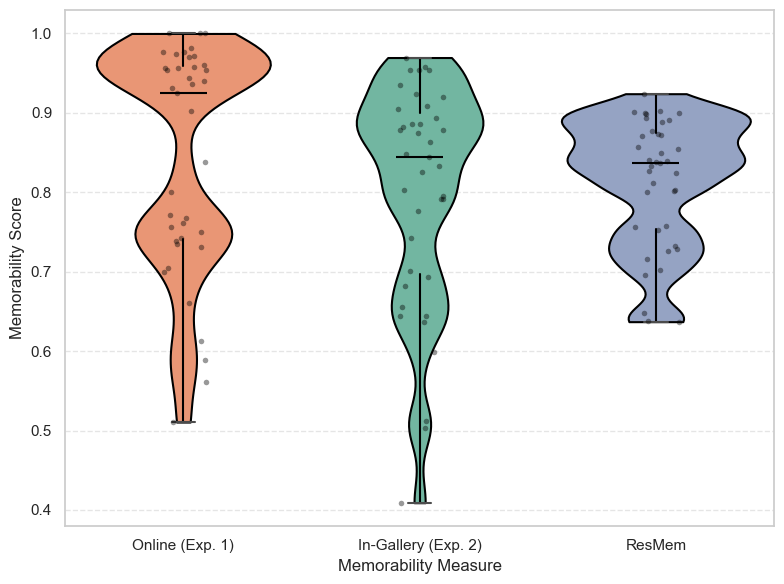

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and filter dataset
file_path = "/Users/Yifei/ARTCONTEST/Analyses/data/All_Predictors.csv"
df = pd.read_csv(file_path)
df_filtered = df[df["Label"].isin(["Mem", "Forg"])]


# Rename relevant columns
df_renamed = df_filtered.rename(columns={
    "OnlineHR": "Online (Exp. 1)",
    "Bayes_IP_HR_FAR": "In-Gallery (Exp. 2)",
    "ResMem": "ResMem"
})

# Reshape for plotting
df_melted = df_renamed.melt(value_vars=["Online (Exp. 1)", "In-Gallery (Exp. 2)", "ResMem"],
                            var_name="Memorability Measure",
                            value_name="Memorability Score")

# Flip the axes: now x = category, y = score
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Violin plot (half-transparent, flipped)
ax = sns.violinplot(
    x="Memorability Measure", y="Memorability Score", data=df_melted,
    inner=None, linewidth=1.5, cut=0, bw=0.2,
    palette={ 
        "Online (Exp. 1)": "#fc8d62", 
        "In-Gallery (Exp. 2)": "#66c2a5", 
        "ResMem": "#8da0cb"
    },
    alpha=0.1
)

# Modify each violin patch to add black outline
for violin in ax.collections:
    violin.set_edgecolor("black")
    violin.set_linewidth(1.5)

# Boxplot (transparent, just median and whiskers)
sns.boxplot(
    x="Memorability Measure", y="Memorability Score", data=df_melted,
    whis=1.5, width=0.2, showcaps=True,
    boxprops={'facecolor':'none', 'edgecolor': 'none', "zorder": 3, 'linewidth': 1.5},
    whiskerprops={'color': 'black', 'linewidth': 1.5}, 
    medianprops={'color': 'black', 'linewidth': 1.5},
    flierprops={"marker": "o", "markersize": 3},
    zorder=2
)

# Jittered strip plot (with flipped axes)
sns.stripplot(
    x="Memorability Measure", y="Memorability Score", data=df_melted,
    size=4, jitter=True, alpha=0.4, color="black", zorder=4
)



# Final plot formatting
#plt.title("Memorability Profiles of Most and Least Remembered Artworks Across Measures", fontsize=14)
plt.ylabel("Memorability Score")
#plt.xlabel("Memorability Measure")
plt.tight_layout()
plt.grid(True, axis="y", linestyle="--", alpha=0.5)

plt.show()


## Graphs for paper:

/var/folders/_p/dcwt1jt95yg1wm_8rsymwz2m0000gp/T/ipykernel_84625/1697232672.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("RdYlGn")


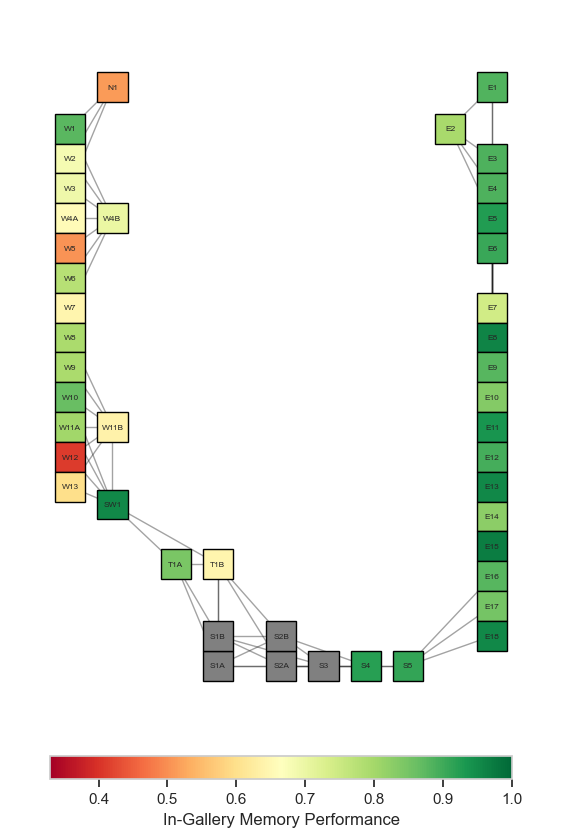

In [10]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load the dataset
df = pd.read_csv("/Users/Yifei/ARTCONTEST/Analyses/data/IP/IP_39_withBayes.csv")

# Extract Bayes_IP values
score_dict = dict(zip(df["Location_Code"], df["Bayes_IP"]))

# Original and new width
original_width = 10
new_width = 7

# Rescale function
def rescale_x(x, original_width, new_width):
    return x * (new_width / original_width)

# Node positions
location_mapping = {
    "N1": (1, 9.7),
    "W1": (0, 9), "W2": (0, 8.5), "W3": (0, 8), "W4A": (0, 7.5), "W4B": (1, 7.5),
    "W5": (0, 7), "W6": (0, 6.5), "W7": (0, 6), "W8": (0, 5.5), "W9": (0, 5), "W10": (0, 4.5),
    "W11A": (0, 4), "W11B": (1, 4), "W12": (0, 3.5), "W13": (0, 3),
    "SW1": (1, 2.7),
    "T1A": (2.5, 1.7), "T1B": (3.5, 1.7),
    "E1": (10, 9.7), "E2": (9, 9), "E3": (10, 8.5), "E4": (10, 8), "E5": (10, 7.5),
    "E6": (10, 7), "E7": (10, 6), "E8": (10, 5.5), "E9": (10, 5), "E10": (10, 4.5),
    "E11": (10, 4), "E12": (10, 3.5), "E13": (10, 3), "E14": (10, 2.5), "E15": (10, 2),
    "E16": (10, 1.5), "E17": (10, 1), "E18": (10, 0.5),
    "S1A": (3.5, 0), "S1B": (3.5, 0.5), "S2A": (5, 0), "S2B": (5, 0.5), "S3": (6, 0),
    "S4": (7, 0), "S5": (8, 0)
}

# Rescale the spatial mapping
location_mapping = {item: (rescale_x(coords[0], original_width, new_width), coords[1])
                    for item, coords in location_mapping.items()}

# Create graph
G = nx.Graph()
for node, pos in location_mapping.items():
    G.add_node(node, pos=pos)

# Adjusted threshold proportionally
scaled_threshold = 3 * (new_width / original_width)

# Add edges based on adjusted distance threshold
for node1, pos1 in location_mapping.items():
    for node2, pos2 in location_mapping.items():
        if node1 != node2:
            dist = ((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)**0.5
            if dist < scaled_threshold:
                G.add_edge(node1, node2)

# Plot
pos = nx.get_node_attributes(G, 'pos')
values = [score_dict.get(node, np.nan) for node in G.nodes()]
norm = Normalize(vmin=0.33, vmax=1.0)
cmap = cm.get_cmap("RdYlGn")

plt.figure(figsize=(7, 10))
ax = plt.gca()

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Draw colored blocks
for node, (x, y) in pos.items():
    score = score_dict.get(node, np.nan)
    color = cmap(norm(score)) if not np.isnan(score) else "gray"
    ax.add_patch(Rectangle((x - 0.25, y - 0.25), 0.5, 0.5, color=color, ec='black'))
    plt.text(x, y, node, fontsize=6, ha="center", va="center")

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.03, pad=0.04)
cbar.set_label("In-Gallery Memory Performance")

plt.xlim(-1, new_width + 1)
plt.ylim(-1, 11)
plt.axis("off")
#plt.title("Gallery Network with In-Person Memory Performance", fontsize=12)
plt.show()


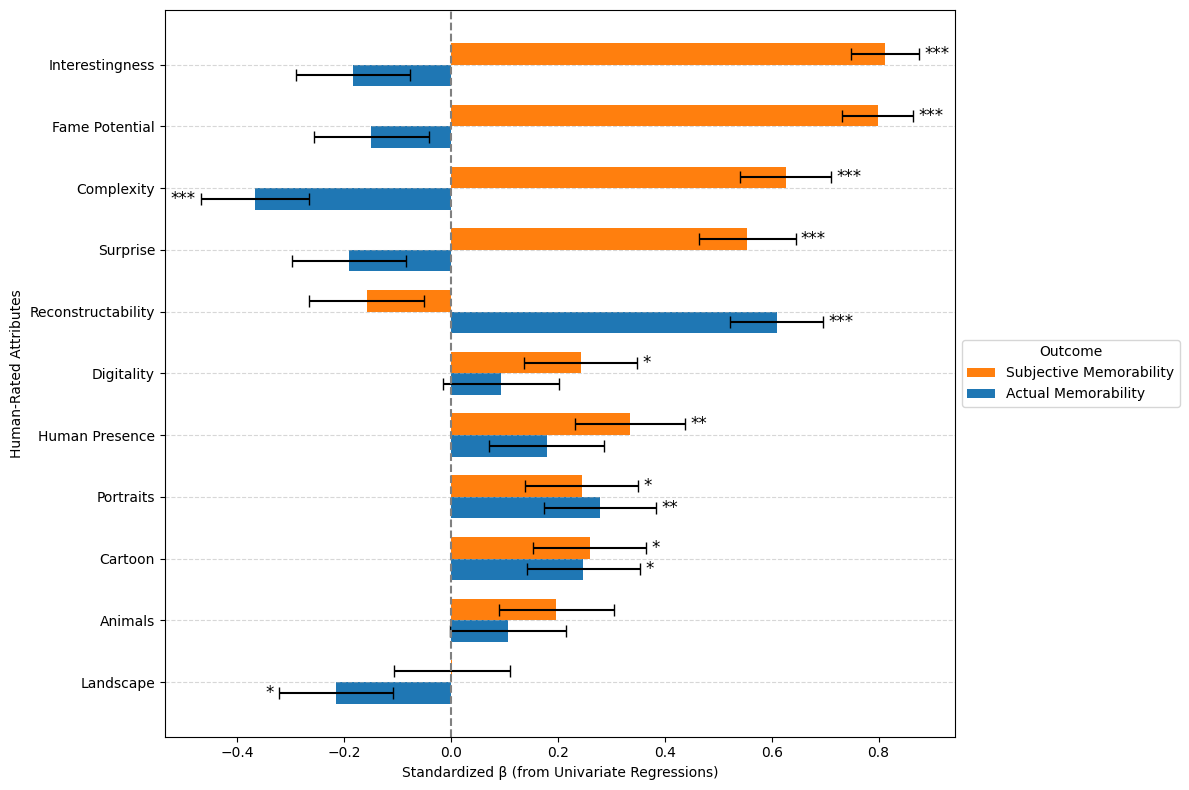

In [50]:
# Re-upload the CSV file and re-run the code
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from re-uploaded file
df = pd.read_csv("/Users/Yifei/ARTCONTEST/Analyses/data/All_Predictors.csv")
df = df[~df["Name"].isin(["Dan - Forget", "Dan - Mem", "Trent - Mem", "Trent - Forget"])]

# Predictor columns from the stepwise regression
predictor_columns = [
    'Reconstructable', 'Digital', 'Human', 'Content_Landscape_Nature', 'Interesting', 'Famous',
    'Surprise', 'Complex', 'Content_Cartoon_ContemporaryIllustration', 'Content_Animals', 'Content_Portraits'
]

# Standardize predictors and outcomes
scaler = StandardScaler()
df[predictor_columns] = scaler.fit_transform(df[predictor_columns])
df["OnlineMem_z"] = scaler.fit_transform(df[["OnlineMem"]])
df["Memorable_z"] = scaler.fit_transform(df[["Memorable"]])

# Function to extract beta, SE, and p-value
def extract_stats(df, predictors, outcome):
    stats = []
    for col in predictors:
        X = sm.add_constant(df[[col]])
        y = df[outcome]
        model = sm.OLS(y, X).fit()
        beta = model.params[col]
        se = model.bse[col]
        p = model.pvalues[col]
        stats.append((beta, se, p))
    return pd.DataFrame(stats, columns=["Beta", "SE", "p"], index=predictors)

# Get stats for both outcomes
actual_stats = extract_stats(df, predictor_columns, "OnlineMem_z")
subjective_stats = extract_stats(df, predictor_columns, "Memorable_z")

# Combine
combined_df = pd.DataFrame({
    "Subjective Beta": subjective_stats["Beta"],
    "Subjective SE": subjective_stats["SE"],
    "Subjective p": subjective_stats["p"],
    "Actual Beta": actual_stats["Beta"],
    "Actual SE": actual_stats["SE"],
    "Actual p": actual_stats["p"]
})

# Readable labels
feature_name_map = {
    "Interesting": "Interestingness",
    "Famous": "Fame Potential",
    "Complex": "Complexity",
    "Surprise": "Surprise",
    "Reconstructable": "Reconstructability",
    "Digital": "Digitality",
    "Human": "Human Presence",
    "Content_Portraits": "Portraits",
    "Content_Cartoon_ContemporaryIllustration": "Cartoon",
    "Content_Animals": "Animals",
    "Content_Landscape_Nature": "Landscape"
}
combined_df.index = combined_df.index.to_series().map(feature_name_map)

# Custom order
custom_order = [
    "Interestingness", "Fame Potential", "Complexity", "Surprise", "Reconstructability",
    "Digitality", "Human Presence", "Portraits", "Cartoon", "Animals", "Landscape"
]
combined_df = combined_df.loc[custom_order]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
y = np.arange(len(combined_df))
colors = ["#ff7f0e", "#1f77b4"]

# Plot bars
subj_bars = ax.barh(y - bar_width/2, combined_df["Subjective Beta"], height=bar_width,
                    xerr=combined_df["Subjective SE"], color=colors[0], label="Subjective Memorability",
                    capsize=4, edgecolor='none')
act_bars = ax.barh(y + bar_width/2, combined_df["Actual Beta"], height=bar_width,
                   xerr=combined_df["Actual SE"], color=colors[1], label="Actual Memorability",
                   capsize=4, edgecolor='none')

# Asterisk annotation
def get_asterisks(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

for i in range(len(combined_df)):
    beta_subj = combined_df["Subjective Beta"].iloc[i]
    se_subj = combined_df["Subjective SE"].iloc[i]
    p_subj = combined_df["Subjective p"].iloc[i]

    beta_act = combined_df["Actual Beta"].iloc[i]
    se_act = combined_df["Actual SE"].iloc[i]
    p_act = combined_df["Actual p"].iloc[i]

    subj_star = get_asterisks(p_subj)
    act_star = get_asterisks(p_act)

    # Place asterisks at the tip of error bars, with a small outward nudge
    if subj_star:
        x_subj = beta_subj + np.sign(beta_subj) * (se_subj + 0.01)
        ax.text(x_subj, y[i] - bar_width / 2, subj_star,
                va='center', ha='left' if beta_subj >= 0 else 'right', fontsize=12)

    if act_star:
        x_act = beta_act + np.sign(beta_act) * (se_act + 0.01)
        ax.text(x_act, y[i] + bar_width / 2, act_star,
                va='center', ha='left' if beta_act >= 0 else 'right', fontsize=12)



# Aesthetics
ax.set_yticks(y)
ax.set_yticklabels(combined_df.index)
ax.invert_yaxis()
ax.axvline(0, color='gray', linestyle='--')
ax.set_xlabel("Standardized β (from Univariate Regressions)")
ax.set_ylabel("Human-Rated Attributes")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Outcome")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
#ax.set_title("Feature-Wise Predictive Strength for Subjective vs. Actual Memorability")

plt.tight_layout()
plt.show()


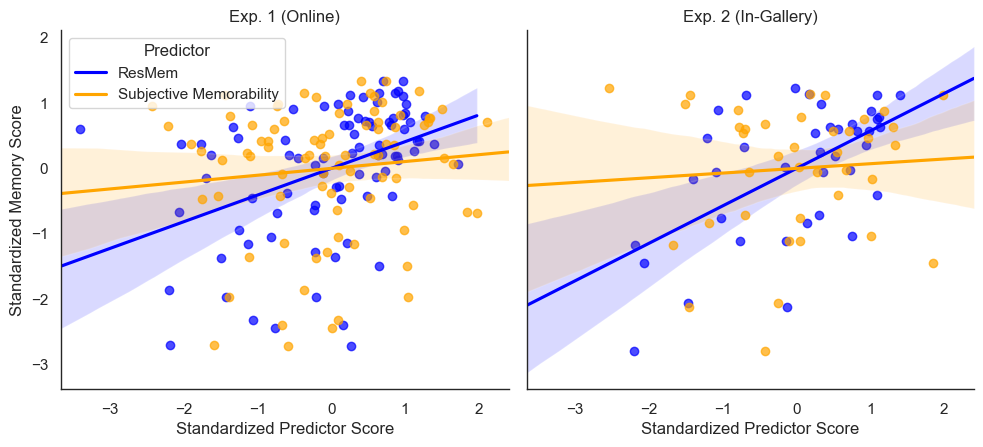

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your dataset
df = pd.read_csv("/Users/Yifei/ARTCONTEST/Analyses/data/All_Predictors.csv")
df = df[~df["Name"].isin(["Dan - Forget", "Dan - Mem", "Trent - Mem", "Trent - Forget"])]
df_inperson = df[df["Label"].isin(["Mem", "Forg"])].copy()

# Standardize predictors and outcomes
scaler = StandardScaler()
df[["ResMem_z", "Memorable_z", "OnlineMem_z"]] = scaler.fit_transform(
    df[["ResMem", "Memorable", "OnlineMem"]])
df_inperson[["ResMem_z", "Memorable_z", "Bayes_IP_HR_FAR_z"]] = scaler.fit_transform(
    df_inperson[["ResMem", "Memorable", "Bayes_IP_HR_FAR"]])

# Prepare melted long-format data
df_online = df.melt(id_vars="Label",
                    value_vars=["ResMem_z", "Memorable_z"],
                    var_name="Predictor", value_name="Score_z")
df_online["Memory_z"] = pd.concat([df["OnlineMem_z"]] * 2, ignore_index=True)
df_online["Context"] = "1 (Online)"

df_ip = df_inperson.melt(id_vars="Label",
                         value_vars=["ResMem_z", "Memorable_z"],
                         var_name="Predictor", value_name="Score_z")
df_ip["Memory_z"] = pd.concat([df_inperson["Bayes_IP_HR_FAR_z"]] * 2, ignore_index=True)
df_ip["Context"] = "2 (In-Gallery)"

df_plot = pd.concat([df_online, df_ip], ignore_index=True)

# === Plot with extended regression lines ===
sns.set(style="white")  # Clean style, no grid

# Create FacetGrid
g = sns.FacetGrid(df_plot, col="Context", hue="Predictor",
                  palette={"ResMem_z": "blue", "Memorable_z": "orange"},
                  height=5, aspect=1)

# Plot extended regression line with CI and no truncation
def plot_extended_regline(data, color, label, **kwargs):
    x = data["Score_z"]
    y = data["Memory_z"]
    sns.regplot(
        x=x,
        y=y,
        scatter=True,
        ci=95,
        color=color,
        line_kws={"label": label},
        truncate=False,
        scatter_kws={"alpha": 0.7},
        ax=plt.gca()
    )

# Map plots
g.map_dataframe(plot_extended_regline)

# Set axis labels and title
g.set_axis_labels("Standardized Predictor Score", "Standardized Memory Score")
g.set_titles("Exp. {col_name}")
g.fig.subplots_adjust(top=0.85)
#g.fig.suptitle("ResMem vs. Human Ratings Across Contexts", fontsize=14)

# Remove internal vertical borders and gridlines
for ax in g.axes.flatten():
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)

# Clean up legend
new_labels = {"ResMem_z": "ResMem", "Memorable_z": "Subjective Memorability"}
handles, labels = g.axes[0][0].get_legend_handles_labels()
g.axes[0][0].legend(handles=handles, labels=[new_labels.get(l, l) for l in labels], title="Predictor")

plt.show()


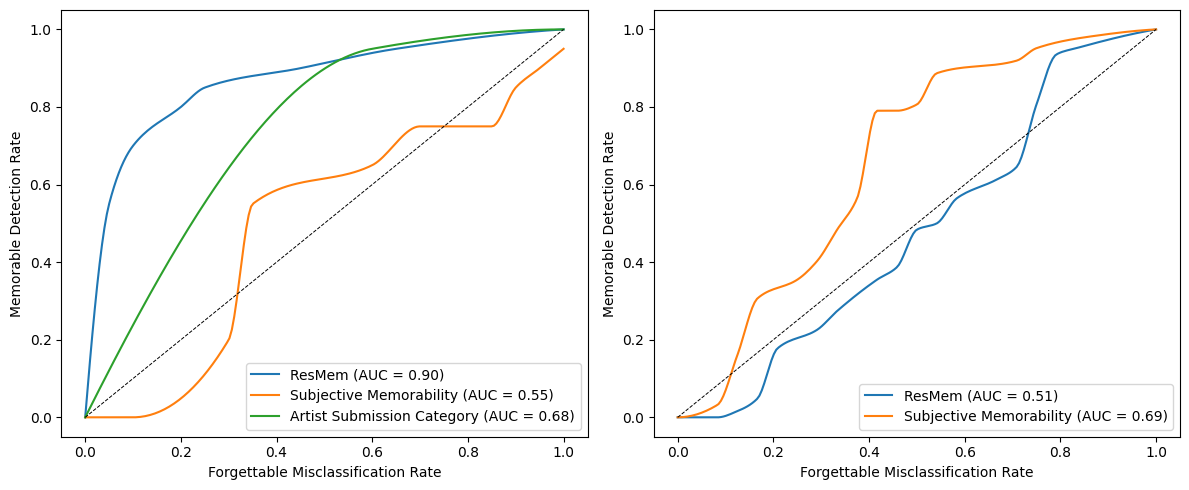

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scipy.interpolate import make_interp_spline

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from scipy.interpolate import PchipInterpolator

# Load and filter dataset
file_path = "/Users/Yifei/ARTCONTEST/Analyses/data/All_Predictors.csv"
df = pd.read_csv(file_path)
df = df[~df["Name"].isin(["Dan - Forget", "Dan - Mem", "Trent - Mem", "Trent - Forget"])]

# Standardize relevant variables
scaler = StandardScaler()
df[["ResMem_z", "Memorable_z", "Contest_z"]] = scaler.fit_transform(df[["ResMem", "Memorable", "Contest"]])

# --- Part 1: Classification predicting Label (based on Rank) ---
# Create a binary label from Rank (1 = memorable, 3 = forgettable)
df_rank = df[df["Rank"].isin([1, 3])].copy()
df_rank["Label_binary"] = df_rank["Rank"].apply(lambda x: 1 if x == 1 else 0)
y_bin_rank = df_rank["Label_binary"]

clf_resmem_rank = LogisticRegression().fit(df_rank[["ResMem_z"]], y_bin_rank)
clf_memorable_rank = LogisticRegression().fit(df_rank[["Memorable_z"]], y_bin_rank)
clf_contest_rank = LogisticRegression().fit(df_rank[["Contest_z"]], y_bin_rank)

probs_resmem_rank = clf_resmem_rank.predict_proba(df_rank[["ResMem_z"]])[:, 1]
probs_memorable_rank = clf_memorable_rank.predict_proba(df_rank[["Memorable_z"]])[:, 1]
probs_contest_rank = clf_contest_rank.predict_proba(df_rank[["Contest_z"]])[:, 1]

auc_resmem_rank = roc_auc_score(y_bin_rank, probs_resmem_rank)
auc_memorable_rank = roc_auc_score(y_bin_rank, probs_memorable_rank)
auc_contest_rank = roc_auc_score(y_bin_rank, probs_contest_rank)

# --- Part 2: Classification predicting Label (based on Contest) ---
# "Contest" is already binary: 1 = memorable submission, 0 = forgettable
df_contest = df.copy()
y_bin_contest = df_contest["Contest"]

clf_resmem_contest = LogisticRegression().fit(df_contest[["ResMem_z"]], y_bin_contest)
clf_memorable_contest = LogisticRegression().fit(df_contest[["Memorable_z"]], y_bin_contest)

probs_resmem_contest = clf_resmem_contest.predict_proba(df_contest[["ResMem_z"]])[:, 1]
probs_memorable_contest = clf_memorable_contest.predict_proba(df_contest[["Memorable_z"]])[:, 1]

auc_resmem_contest = roc_auc_score(y_bin_contest, probs_resmem_contest)
auc_memorable_contest = roc_auc_score(y_bin_contest, probs_memorable_contest)

def smooth_roc(fpr, tpr, points=200):
    fpr_unique, idx = np.unique(fpr, return_index=True)
    tpr_unique = tpr[idx]

    fpr_new = np.linspace(fpr_unique.min(), fpr_unique.max(), points)
    pchip = PchipInterpolator(fpr_unique, tpr_unique)
    tpr_smooth = pchip(fpr_new)
    return fpr_new, tpr_smooth

# ---------- ROC Curve Plotting ----------
plt.figure(figsize=(12, 5))

# --- Rank-Based Classification ---
plt.subplot(1, 2, 1)
fpr_resmem, tpr_resmem, _ = roc_curve(y_bin_rank, probs_resmem_rank)
fpr_memorable, tpr_memorable, _ = roc_curve(y_bin_rank, probs_memorable_rank)
fpr_contest, tpr_contest, _ = roc_curve(y_bin_rank, probs_contest_rank)

fpr_resmem_s, tpr_resmem_s = smooth_roc(fpr_resmem, tpr_resmem)
fpr_memorable_s, tpr_memorable_s = smooth_roc(fpr_memorable, tpr_memorable)
fpr_contest_s, tpr_contest_s = smooth_roc(fpr_contest, tpr_contest)

plt.plot(fpr_resmem_s, tpr_resmem_s, label=f'ResMem (AUC = {auc_resmem_rank:.2f})')
plt.plot(fpr_memorable_s, tpr_memorable_s, label=f'Subjective Memorability (AUC = {auc_memorable_rank:.2f})')
plt.plot(fpr_contest_s, tpr_contest_s, label=f'Artist Submission Category (AUC = {auc_contest_rank:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=0.7)
plt.xlabel('Forgettable Misclassification Rate')
plt.ylabel('Memorable Detection Rate')
#plt.title('Smoothed ROC Curve - Contest Outcome Classification')
plt.legend(loc='lower right')
plt.grid(False)

# --- Contest-Based Classification ---
plt.subplot(1, 2, 2)
fpr_resmem_c, tpr_resmem_c, _ = roc_curve(y_bin_contest, probs_resmem_contest)
fpr_memorable_c, tpr_memorable_c, _ = roc_curve(y_bin_contest, probs_memorable_contest)

fpr_resmem_c_s, tpr_resmem_c_s = smooth_roc(fpr_resmem_c, tpr_resmem_c)
fpr_memorable_c_s, tpr_memorable_c_s = smooth_roc(fpr_memorable_c, tpr_memorable_c)

plt.plot(fpr_resmem_c_s, tpr_resmem_c_s, label=f'ResMem (AUC = {auc_resmem_contest:.2f})')
plt.plot(fpr_memorable_c_s, tpr_memorable_c_s, label=f'Subjective Memorability (AUC = {auc_memorable_contest:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=0.7)
plt.xlabel('Forgettable Misclassification Rate')
plt.ylabel('Memorable Detection Rate')
#plt.title('Smoothed ROC Curve - Artist Label Classification')
plt.legend(loc='lower right')
plt.grid(False)

plt.tight_layout()
plt.show()

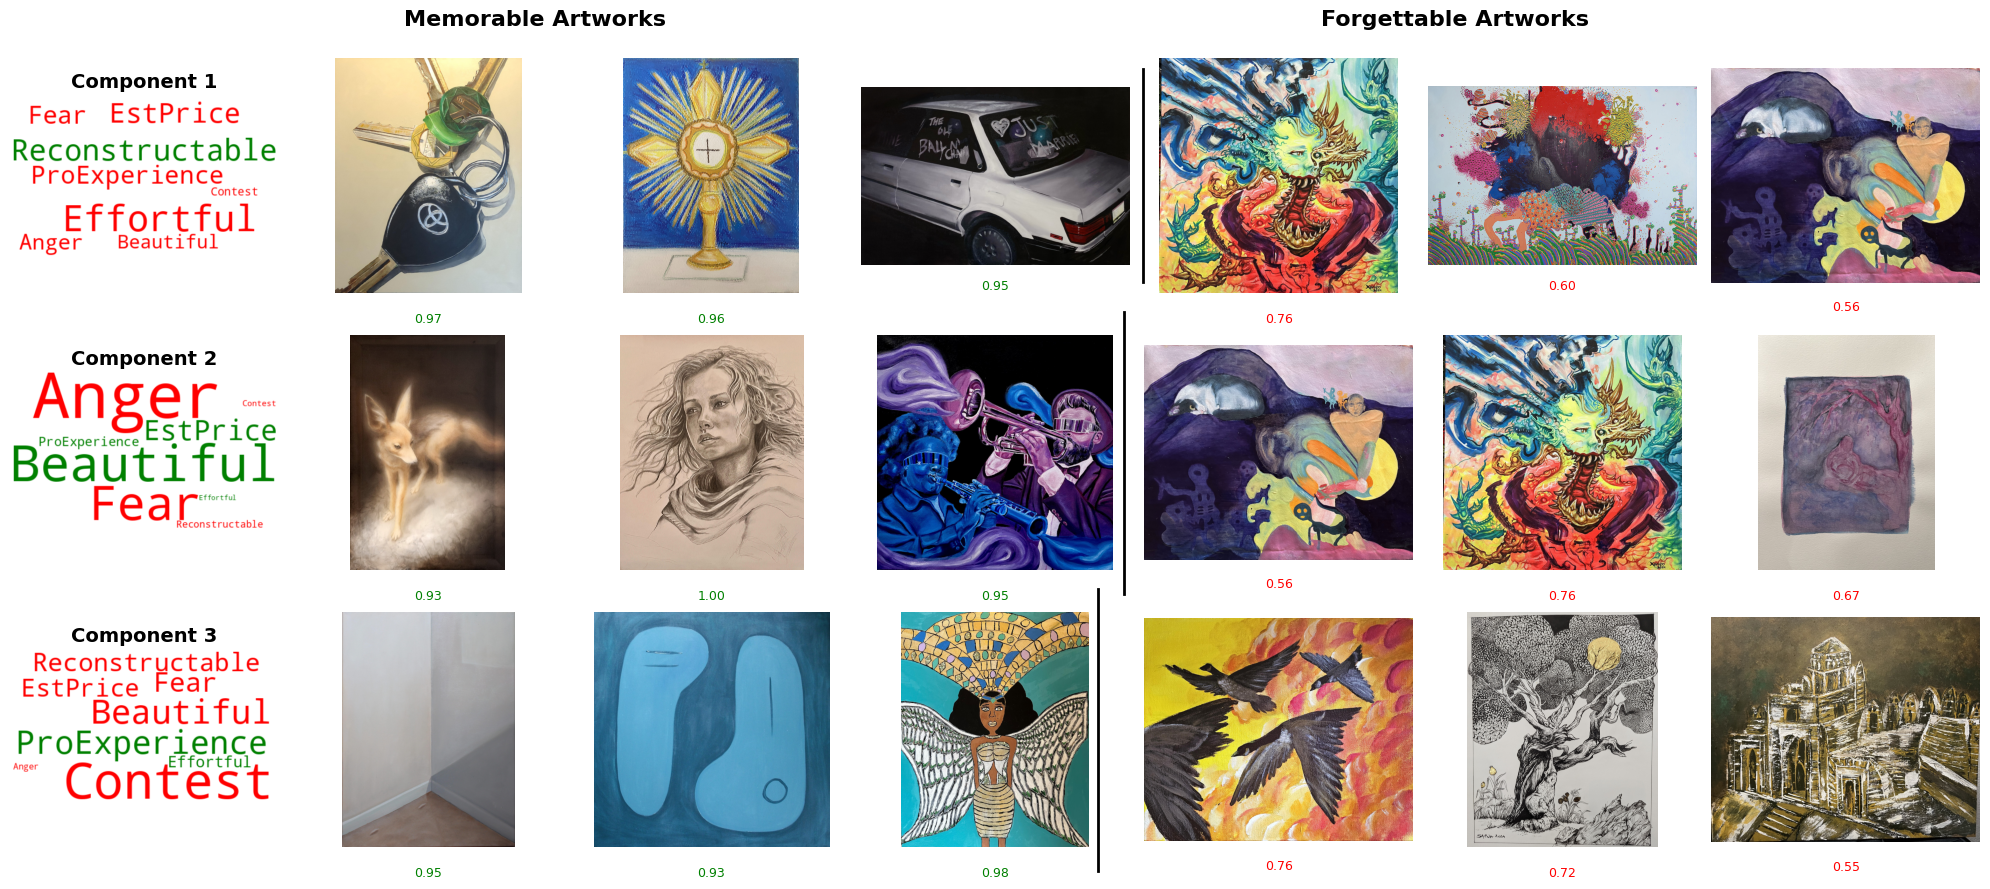

In [21]:
# Re-import necessary modules after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from PIL import Image
import os
import numpy as np
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("/Users/Yifei/ARTCONTEST/Analyses/data/All_Predictors.csv")
df = df[~df["Name"].isin(["Dan - Forget", "Dan - Mem", "Trent - Mem", "Trent - Forget"])]

# Feature selection
selected_features = ['Anger', 'Fear', 'Beautiful', 'Effortful', 'Reconstructable', 'Price_RTS', 'Contest', 'ProLevel']
feature_display_map = {
    'Anger': 'Anger', 'Fear': 'Fear', 'Beautiful': 'Beautiful', 'Effortful': 'Effortful',
    'Reconstructable': 'Reconstructable', 'Price_RTS': 'EstPrice',
    'Contest': 'Contest', 'ProLevel': 'ProExperience'
}

# Standardize
X = df[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Flip for better visual
for i in range(5):
    pca.components_[i] *= -1
    X_pca[:, i] *= -1

# Assign PC scores
for i in range(5):
    df[f"PC{i+1}"] = X_pca[:, i]

# Get top images from groups
top_images_pos = {}
top_images_neg = {}

for i in range(3):  # only first 3 PCs
    mem_df = df[df["Group"] == "Top 20 Mem"].sort_values(f"PC{i+1}", ascending=False).head(3)
    forg_df = df[df["Group"] == "Top 20 Forg"].sort_values(f"PC{i+1}", ascending=True).head(3)
    top_images_pos[i] = mem_df[["Image_Num", "OnlineMem"]].values.tolist()
    top_images_neg[i] = forg_df[["Image_Num", "OnlineMem"]].values.tolist()

# Set up figure
image_dir = "/Users/Yifei/ARTCONTEST/90 Images/"
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20, 9))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

# Visualize each component
for row in range(3):
    loadings = pca.components_[row]
    words = [feature_display_map[f] for f in selected_features]
    abs_loadings = np.abs(loadings)
    norm_loadings = abs_loadings / np.max(abs_loadings)
    wc_data = dict(zip(words, norm_loadings * 100))
    color_func = {feature_display_map[f]: ("green" if w > 0 else "red") for f, w in zip(selected_features, loadings)}
    
    def color_function(word, *args, **kwargs):
        return color_func.get(word, "gray")

    # Word cloud
    wc = WordCloud(width=500, height=300, background_color='white').generate_from_frequencies(wc_data)
    ax_wc = axes[row, 0]
    ax_wc.imshow(wc.recolor(color_func=color_function), interpolation='bilinear')
    ax_wc.axis("off")
    ax_wc.set_title(f"Component {row+1}", fontsize=14, weight="bold")

    # Memorable images
    for col, (img_num, score) in enumerate(top_images_pos[row]):
        ax = axes[row, col + 1]
        img_path = os.path.join(image_dir, f"image ({int(img_num)}).jpg")
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, f"Missing\n{img_num}", ha="center", va="center")
        ax.axis("off")
        # Score placed just below image with minimal padding
        ax.text(0.5, -0.08, f"{score:.2f}", transform=ax.transAxes,
                ha='center', va='top', fontsize=9, color="green")

    # Forgettable images
    for col, (img_num, score) in enumerate(top_images_neg[row]):
        ax = axes[row, col + 4]
        img_path = os.path.join(image_dir, f"image ({int(img_num)}).jpg")
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, f"Missing\n{img_num}", ha="center", va="center")
        ax.axis("off")
        ax.text(0.5, -0.08, f"{score:.2f}", transform=ax.transAxes,
                ha='center', va='top', fontsize=9, color="red")

    # Divider line between memorable and forgettable images
    axes[row, 3].plot([1.05, 1.05], [-0.1, 1.1], color="black", linewidth=2, transform=axes[row, 3].transAxes, clip_on=False)

# Section titles
fig.text(0.27, 0.96, "Memorable Artworks", ha="center", fontsize=16, weight="bold")
fig.text(0.73, 0.96, "Forgettable Artworks", ha="center", fontsize=16, weight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()